# Neural Network over Iris Dataset

## Import Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

# Load the Iris Data Set

In [2]:
iris = datasets.load_iris()
X = iris.data
y= np.atleast_2d(iris.target).T


In [3]:
y_n = np.array(y).reshape(-1)
print(y_n)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
# Reshape output in array format
copy3=np.reshape(y, (150,))
print(copy3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Define Parameters

In [5]:
# Learning Rate
eta = 0.01

# Number of epochs for learning
epochs = 2000

#Input layer
inputLayer = X.shape[1]

# Number of Hidden Neurons
hidden = 10

# Drop out rate probability (drp = 1 means no dropout)
drp = 1

# Define Functions

In [6]:
class Neural_Network(object):
    def __init__(self, eta, inputL, hiddenL, drp):

        # Define NN structure parameters
        self.inputLayer = inputL
        self.hidden = hiddenL
        self.outputLayer = 1
        self.eta = eta
        self.drp = drp

        # Initialise random weights based on NN structure
        self.w01 = np.random.random((self.inputLayer, self.hidden))
        self.w12 = np.random.random((self.hidden, self.outputLayer))
        

        # Initialise Weights Learning lists to keep track of weights learning curve
        self.w01_list = []
        self.w12_list = []
        self.w01_curve = []
        self.w12_curve = []

        # Initialise Error list to keep track of Error learning curve
        self.E_o = []
        #error_total=[]
        self.E_o_type0=[]
        self.E_o_type1=[]
        self.E_o_type2=[]

    def feedforward(self,X,mode):
        # ****************************************************************************
        # Feedforward FUNCTION
        # 
        # Purpose of this function is to calculate the NN output based on the Input X,
        # the given Weights per layer and the activation function for each neuron. The
        # function is designed to cater for Dropout feature, which scales the weights
        # of the NN during Testing, by probability p, which is a parametrised using 
        # input variable k. Typical default dropout value is 0.5. For k=1 there is no 
        # dropout
        # 
        # Paramenters
        # X     :Input vector
        # mode  :Select "0" for Training Mode or Select "1" for Testing Mode
        # k     :Optional input for the Dropout Hyperparameter, when applicable. If not
        #        specified, it is defaulted to NN configuration

        # When training (mode="0") Drop out applies for the hidden layer outputs a_h
        if mode == 0:
            #print("Testing mode activated")
            self.z_h = np.dot(X, self.w01)
            a_h = self.sigmoid(self.z_h)
            
            # Dropout term: random noise added to input ah (output of the hidden layer 
            # but input to the output) with probability "p"
            r = np.random.binomial(size=a_h.shape,n=1,p=self.drp)
            a_h *= r
            
            self.z_o = np.dot(a_h, self.w12)
            a_o = self.sigmoid(self.z_o)
            
        # When Testing (mode = "1") we use the normal weights w12 (not scaled with p)
        elif mode == 1:
            #print("Training mode activated")
            self.z_h = np.dot(X, self.w01)
            a_h = self.sigmoid(self.z_h)
            self.z_o = np.dot(a_h, self.w12)
            a_o = self.sigmoid(self.z_o)

        return(a_o,a_h)


    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))


    def backprop(self,X,y,a_o,a_h):
        # Backpropagation
        ## Output to Hidden Layer weights
        self.delta_E_o = a_o - y
        self.delta_a_o = self.sigmoid(a_o,derivative=True)
        self.delta_z_o = a_h
        self.delta_E_w12 = np.dot(self.delta_z_o.T,(self.delta_E_o * self.delta_a_o))

        ## Hidden to Input Layer weights
        self.delta_E_h = np.dot(self.delta_E_o * self.delta_a_o, self.w12.T)
        self.delta_a_h = self.sigmoid(a_h,derivative=True)
        self.delta_z_h = X
        self.delta_E_w01 = np.dot(self.delta_z_h.T, self.delta_E_h * self.delta_a_h)

        # Store All weights throughout learning
        self.w01_list.append(self.w01)
        self.w12_list.append(self.w12)

        # Adjust weights
        self.w01 = self.w01 - eta * self.delta_E_w01
        self.w12 = self.w12 - eta * self.delta_E_w12

        
    def saveWeights(self):
        np.savetxt("w1.txt", self.w01, fmt="%s")
        np.savetxt("w2.txt", self.w12, fmt="%s")
        # print("Input-Hidden Layer weights:\n",self.w01)
        # print("\nHidden-Output Layer weights:\n",self.w12)

    def weightsCurve(self):
        for i in range(self.w01.shape[0]):
            for j in range(self.w01.shape[1]):
                for x in range(len(self.w01_list)):
                    self.w01_curve.append(self.w01_list[x][i][j])
                    #print("Weights w[",x,"],[",i,"],[",j,"] stored")
                    #print(w01_list[x][i][j])

    def error(self,a_o, y):
        a_o_error = ((1 / 2) * (np.power((a_o - y), 2)))
        return a_o_error
    
    def errorCurve(self, error, irisType):
        # Creating a single Error curve function for all Errors by specifying type "iritType" each time
        # error & type arguments: Following errors would be used as input but including type
        # to make it explicit and clear which one should be returned: 
        # a_o_err_y for type t=''
        # a_o_err_y0 for type t = 0
        # a_o_err_y1 for type t = 1
        # a_o_err_y2 for type t = 2
        if irisType == '':
            self.E_o = np.append(self.E_o, sum(error))
            return self.E_o
        elif irisType == 0:
            self.E_o_type0 = np.append(self.E_o_type0, sum(error))
            return self.E_o_type0
        elif irisType == 1:
            self.E_o_type1 = np.append(self.E_o_type1, sum(error))
            return self.E_o_type1
        elif irisType == 2:
            self.E_o_type2 = np.append(self.E_o_type2, sum(error))
            return self.E_o_type2
        
    def train(self,X,y):
        a_o, a_h = self.feedforward(X,0)
        self.backprop(X,y,a_o,a_h)

    def plot(self, E_o):
        fig = plt.figure()
        plt.plot(E_o)
        if self.drp == 1:
            fig.suptitle('Error', fontsize=16)
        elif self.drp == 0.5:
            fig.suptitle('Error with Dropout', fontsize=16)
        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel('Error achieved', fontsize=12)
        if self.drp == 1:
            fig.savefig('Error.jpg')
        elif self.drp == 0.5:
            fig.savefig('Error with Dropout.jpg')
        
        plt.show()

    def predict(self, X):
        a_o, a_h = self.feedforward(X,1)
        print("Minimum Error achieved:", min(self.E_o)) 
        print("Epochs run:", epochs)
        print("Hidden neurons",self.hidden)
        print("Learning Rate:",self.eta)
        #np.savetxt("Predicted_Output.csv", a_o, delimiter=",")
        #print("\nPredicted Output based on trained weights:")
        #print(a_o)
        #print("\n")
        
    def plotWeights(self, epochs):
        fig = plt.figure()
        numberOfWeights = self.w01.shape[1]*self.w01.shape[0]
        for k in range(numberOfWeights):
            t= self.w01_curve[(epochs*k):(epochs*(k+1)-1)]
            plt.plot(t)
        if self.drp == 1:
            fig.suptitle('W01 Weights learning', fontsize=16)
        elif self.drp == 0.5:
            fig.suptitle('W01 Weights learning WITH dropout', fontsize=16)
        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel('W01', fontsize=12)
        #fig.savefig('W01_curve.jpg')

# Start feeding forward and backpropagate *epochs* times.

In [7]:

# Initiating 2 NNs with the following function and input parameters
# Neural_Network(eta, hidden, drp)

# Neural Network without Dropout
NN1 = Neural_Network(0.01, inputLayer, 10, 1)

# Neural Network with Dropout
NN2 = Neural_Network(0.01, inputLayer, 10, 0.5)


for epoch in range(epochs):
    #Forward pass
    a_o, a_h  = NN1.feedforward(X,0)
    b_o, b_h  = NN2.feedforward(X,0)
    
    # Calculate the error and sub-type errors for NN1
    a_o_error = NN1.error(a_o, y)
    # Split out type 0, 1 and 2 errors in separate variables         
    a_o_err_y = np.concatenate((a_o_error,y), axis=1)
    a_o_err_y0 = a_o_err_y[a_o_err_y[:,1]==0][:,0]
    a_o_err_y1 = a_o_err_y[a_o_err_y[:,1]==1][:,0]
    a_o_err_y2 = a_o_err_y[a_o_err_y[:,1]==2][:,0]
   
    # Calculate the error and sub-type errors for NN1
    b_o_error = NN2.error(b_o,y)
    # Split out type 0, 1 and 2 errors in separate variables         
    b_o_err_y = np.concatenate((b_o_error,y), axis=1)
    b_o_err_y0 = b_o_err_y[b_o_err_y[:,1]==0][:,0]
    b_o_err_y1 = b_o_err_y[b_o_err_y[:,1]==1][:,0]
    b_o_err_y2 = b_o_err_y[b_o_err_y[:,1]==2][:,0]
    
    
    # Build NN1 error curve while learning
    E_o_1 = NN1.errorCurve(a_o_error,'')    
    E_o_1_type0 = NN1.errorCurve(a_o_err_y0,0)
    E_o_1_type1 = NN1.errorCurve(a_o_err_y1,1)
    E_o_1_type2 = NN1.errorCurve(a_o_err_y2,2)
    
    # Build NN2 error curve while learning
    E_o_2 = NN2.errorCurve(b_o_error,'')    
    E_o_2_type0 = NN2.errorCurve(b_o_err_y0,0)
    E_o_2_type1 = NN2.errorCurve(b_o_err_y1,1)
    E_o_2_type2 = NN2.errorCurve(b_o_err_y2,2)
    
    
    # Build error curve while learning
    E = [E_o_1, E_o_2]
    
    # Train Neural Networks and construct weights learning curve as it learns
    NN1.train(X, y)
    NN1.weightsCurve

    NN2.train(X, y)
    NN2.weightsCurve




## NN - Predict and Plot

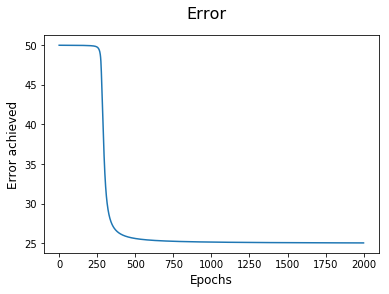

Minimum Error achieved: 25.071147743839706
Epochs run: 2000
Hidden neurons 10
Learning Rate: 0.01


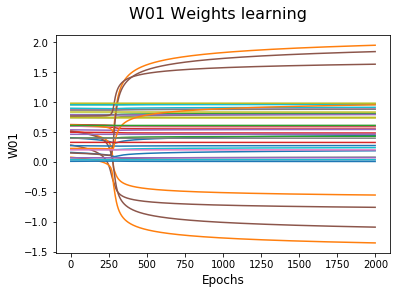

In [8]:
# Neural Network without Dropout
NN1.plot(E_o_1)
NN1.predict(X)

# Build Weights curve using wxx_list and plot weights
NN1.weightsCurve()
NN1.plotWeights(epochs)


## NN with Dropout

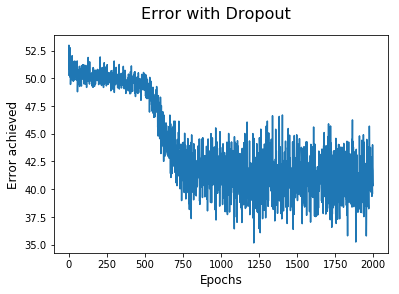

Minimum Error achieved: 35.158089748591884
Epochs run: 2000
Hidden neurons 10
Learning Rate: 0.01


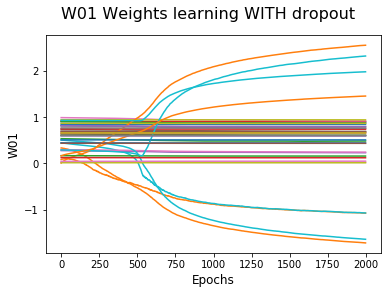

In [9]:
# Neural Network WITH Dropout
NN2.plot(E_o_2)
NN2.predict(X)

# Build Weights curve using wxx_list and plot weights
NN2.weightsCurve()
NN2.plotWeights(epochs)


# Show final total error, type contribution to error

In [10]:
print("Total error:",sum(a_o_error))
print("Type 0 error:",sum(a_o_err_y0))
print("Type 1 error:",sum(a_o_err_y1))
print("Type 2 error:",sum(a_o_err_y2))

Total error: [25.07114774]
Type 0 error: 0.025855003481178918
Type 1 error: 0.0006753669093497102
Type 2 error: 25.04461737344918


# Plot NN1 error

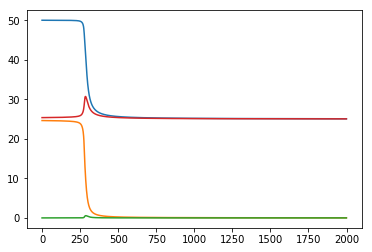

In [11]:
plt.plot(E_o_1)
plt.plot(E_o_1_type0)
plt.plot(E_o_1_type1)
plt.plot(E_o_1_type2)

# NN1 - Show independent, dependent, predicted values

In [12]:
a_o, a_h = NN1.feedforward(X,1)
#print(np.concatenate((X,y,a_o),axis=1))

# Plot NN2 error

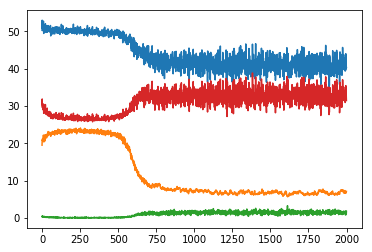

In [13]:
plt.plot(E_o_2)
plt.plot(E_o_2_type0)
plt.plot(E_o_2_type1)
plt.plot(E_o_2_type2)

# NN1 - Show independent, dependent, predicted values

In [14]:
a_o_2, a_h_2 = NN2.feedforward(X,1)
#print(np.concatenate((X,y,a_o_2),axis=1))

# Plot Error Diff

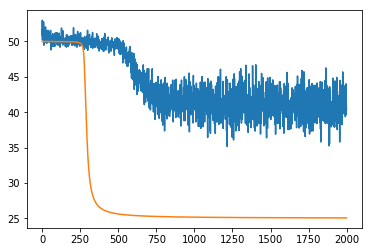

In [15]:
#plt.plot(E)

plt.plot(E_o_2)
plt.plot(E_o_1)

# Save all NN weights

In [16]:
# Save ALL Weights used for prediction
#NN1.saveWeights()
#NN2.saveWeights()
